In [1]:
import pandas as pd
df_claim_cpc_new_full = pd.read_csv('/home/ubuntu/deeppatentsimilarity/patentdata/df_claim_cpc_new_full_raw_p.csv')

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

#Filtering just general category
# df_claim_cpc_new_full['group_id'] = df_claim_cpc_new_full.group_id.apply(lambda x:[a.split(',')[0] for a in x])
df_claim_cpc_new_full['group_id'] = df_claim_cpc_new_full['group_id'].str.split(',')
df_claim_cpc_new_full['group_id'] = df_claim_cpc_new_full['group_id'].apply(lambda x:pd.Series(x).unique())

# Tranforming output variable to one-hot encoded output features
mlb = MultiLabelBinarizer(sparse_output=True)

# Construing final dataframe
df = df_claim_cpc_new_full.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df_claim_cpc_new_full.pop('group_id')),
                index=df_claim_cpc_new_full.index,
                columns=mlb.classes_))
# df = df.drop("group_id",axis=1)

In [3]:
df.columns[7:]

Index(['A01B', 'A01C', 'A01D', 'A01F', 'A01G', 'A01H', 'A01J', 'A01K', 'A01L',
       'A01M',
       ...
       'Y02B', 'Y02C', 'Y02D', 'Y02E', 'Y02P', 'Y02T', 'Y02W', 'Y04S', 'Y10S',
       'Y10T'],
      dtype='object', length=660)

In [4]:
df_raw = df
df.shape

(247027, 667)

In [5]:
categories_cols = df.columns[7:]
labels = df[categories_cols]
#Removing labels which occur only once.
# labels_to_remove_1 = labels_1[labels_1.columns[labels_1.sum(axis=0) <30]].columns

labels_to_remove = labels[labels.columns[labels.sum(axis=0) <1000]].columns

In [6]:
labels_to_remove

Index(['A01B', 'A01C', 'A01D', 'A01F', 'A01G', 'A01J', 'A01L', 'A01M', 'A21B',
       'A21C',
       ...
       'H04Q', 'H04S', 'H04T', 'H05C', 'H05F', 'H05G', 'H05H', 'Y02C', 'Y02W',
       'Y04S'],
      dtype='object', length=527)

In [7]:
df['text'] = df['text'].str[3:]

In [8]:
for item in labels_to_remove:
    df = df[df[item] != 1]

In [9]:
print(df_claim_cpc_new_full.shape)
df.shape

(247027, 7)


(163269, 667)

In [10]:
df_claim_cpc_new_full.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'patent_id', 'section_id',
       'subsection_id', 'subgroup_id', 'text'],
      dtype='object')

In [11]:
df_pre_new = df.drop(labels_to_remove,axis=1)
df_pre_new.shape

(163269, 140)

In [12]:
from sklearn.model_selection import train_test_split
# split into train test sets
df_claim_train, df_claim_test = train_test_split(df_pre_new, test_size=0.08)

In [13]:
df_claim_test.shape

(13062, 140)

In [14]:
df_claim_train.shape

(150207, 140)

In [15]:
categories_cols = df_claim_train.columns[7:]
labels = df_claim_train[categories_cols]
#Removing labels which occur only once.
# labels_to_remove_1 = labels_1[labels_1.columns[labels_1.sum(axis=0) <30]].columns

labels_to_remove_train = labels[labels.columns[labels.sum(axis=0) <2000]].columns

In [16]:
labels_to_remove_train

Index(['A01H', 'A01K', 'A01N', 'A23L', 'A47C', 'A47L', 'A61L', 'A61N', 'A61Q',
       'A63B',
       ...
       'H03K', 'H03M', 'H04J', 'H04R', 'H05B', 'Y02A', 'Y02B', 'Y02E', 'Y02P',
       'Y10S'],
      dtype='object', length=102)

In [17]:
for item in labels_to_remove_train:
    df_claim_test = df_claim_test[df_claim_test[item] != 1]

In [18]:
df_claim_test.shape

(7365, 140)

In [19]:
df_claim_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'patent_id', 'section_id',
       'subsection_id', 'subgroup_id', 'text', 'A01H', 'A01K', 'A01N',
       ...
       'H05B', 'H05K', 'Y02A', 'Y02B', 'Y02D', 'Y02E', 'Y02P', 'Y02T', 'Y10S',
       'Y10T'],
      dtype='object', length=140)

In [20]:
df_claim_test = df_claim_test.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df_claim_train = df_claim_train.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [21]:
df_claim_test.shape

(7365, 138)

In [22]:
df_claim_train.shape

(150207, 138)

In [23]:
df_claim_test.columns[5:]

Index(['A01H', 'A01K', 'A01N', 'A23L', 'A47C', 'A47L', 'A61B', 'A61F', 'A61K',
       'A61L',
       ...
       'H05B', 'H05K', 'Y02A', 'Y02B', 'Y02D', 'Y02E', 'Y02P', 'Y02T', 'Y10S',
       'Y10T'],
      dtype='object', length=133)

In [24]:
df_claim_train_l = df_claim_train.iloc[:, 5:]
df_claim_test_l = df_claim_test.iloc[:, 5:]

In [25]:
s = df_claim_train_l.sum()
d = df_claim_test_l.sum()

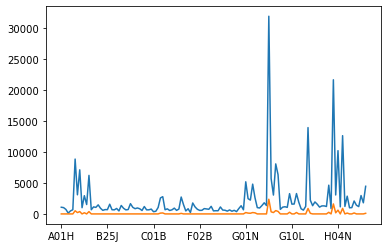

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

s.plot()
d.plot()